# NYC TLC

Perusahaan taksi NYC membutuhkan strategi berbasis data untuk meningkatkan pendapatan dan efisiensi operasional tanpa harus menambah armada. Melalui analisis data perjalanan dari NYC TLC, perusahaan dapat mengidentifikasi pola waktu, lokasi, dan jenis perjalanan yang paling menguntungkan.

Analisis ini akan paling efektif jika disampaikan kepada COO dan diteruskan kepada Technology & Data Unit untuk implementasi teknis, serta kepada Consumer Relations untuk menindaklanjuti aspek layanan publik dan regulasi.

Business Question:

1. Kapan waktu dan lokasi dengan pendapatan tertinggi dan terendah?
2. Adakah pola biaya yang tinggi pada lokasi tertentu?
3. Berapa persen trip yang sangat pendek (<1 mile), dan apakah itu efisien secara operasional?
4. Apakah ada tren musiman yang memengaruhi volume trip dan revenue?

In [2186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

In [2187]:
df = pd.read_csv('NYC TLC Trip Record.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\1402211860.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


In [2188]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


# Data Cleaning

Mengecek baris dan kolom di mana saja yang terdapat nilai kosong

<Axes: >

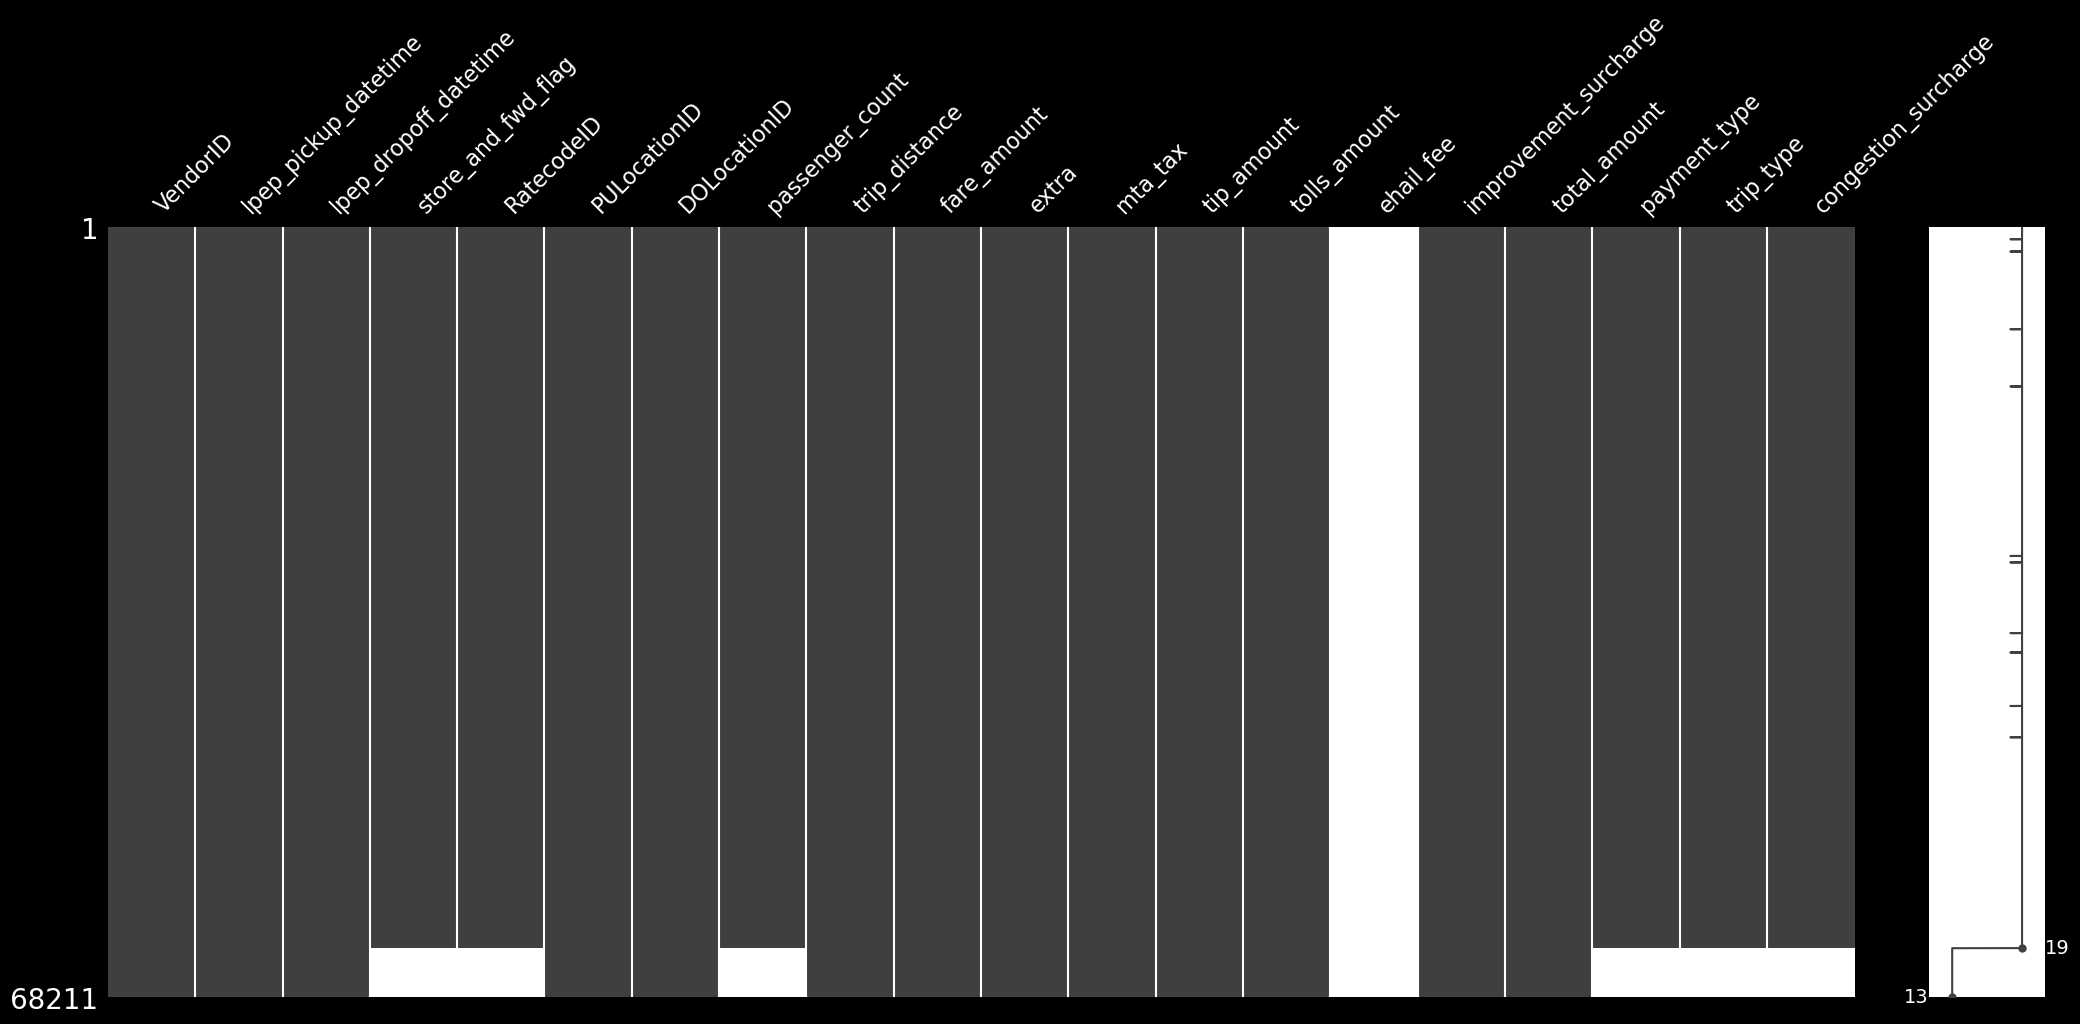

In [2189]:
missingno.matrix(df)

In [2190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Melakukan drop pada kolom ehail_fee karena persentasenya 100% atau semua baris di kolom ehail_fee tidak ada isi atau kosong

In [2191]:
# drop ehail_fee
df = df.drop('ehail_fee', axis = 1)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [2192]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


In [2193]:
df.describe(include = object)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [2194]:
# ubah tipe data kolom lpep_pickup_datetime dan lpep_dropoff_datetime menjadi tipe data datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

Mengecek baris pada kolom mana saja yang terdapat nilai kosong

In [2195]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

Insight :
terdapat perbedaan jumlah baris yang berisi kosong
- Pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, congestion_surcharge terdapat 4324 baris yang kosong
- Pada kolom trip_type terdapat 4334 baris yang kosong

In [2196]:
# mengecek apakah terdapat nilai yang duplikat
df.duplicated().sum()

0

In [2197]:
df[df['trip_type'].isna()].head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


terdapat 10 RatecodeID yang berisi tidak sesuai (99)

In [2198]:
# mencari presentase dari baris yang kosong
df.isnull().mean() * 100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       6.339154
RatecodeID               6.339154
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             6.339154
trip_type                6.353814
congestion_surcharge     6.339154
dtype: float64

Rata-rata kolom yang terdapat nilai kosong sebesar 6.3%

==================================================================================================================================================================================

Melakukan drop pada kolom yang bernilai kosong

In [2199]:
df_clean = df.dropna()

In [2200]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Mengecek apakah terdapat baris pada suatu kolom ada yang bernilai anomali (tidak logis/tidak sesuai konteks)

In [2201]:
df_clean.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


Terdapat 9 kolom yang berisi nilai anomali (tidak logis/tidak sesuai konteks) (minimunnya terdapat 0 atau bahkan bernilai negatif):
- passenger_count
- trip_distance
- fare_amount
- extra
- mta_tax
- tip_amount
- improvement_surcharge
- total_amount
- congestion_surcharge

In [2202]:
# menambahkan kolom trip_duration_min (dalam menit) untuk keperluan analisis
df_clean['trip_duration_min'] = (df_clean['lpep_dropoff_datetime'] - df_clean['lpep_pickup_datetime']).dt.total_seconds() / 60

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\2458353149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['trip_duration_min'] = (df_clean['lpep_dropoff_datetime'] - df_clean['lpep_pickup_datetime']).dt.total_seconds() / 60


In [2203]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333


In [2204]:
df_clean.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862,17.973569
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000,7.083333
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000,11.100000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000,16.883333
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,1439.883333
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897,77.301793


Terdapat nilai anomali/tidak logis/tidak seusai konteks lagi pada trip_duration_min, bernilai 0

In [2205]:
(df_clean['trip_distance'] == 0).sum()

3197

In [2206]:
(df['trip_distance'] == 0).sum()/len(df) * 100

4.911231326325666

Terdapat 4.9% baris yang berisi nilai anomali/tidak logis/tidak sesuai konteks pada kolom trip_distance

In [2207]:
# melakukan drop baris yang pada kolom trip_distance yang bernilai 0
df_clean = df_clean[(df_clean['trip_distance'] > 0)]

In [2208]:
df_clean.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
count,60680.000000,60680,60680,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000,60680.000000
mean,1.872825,2023-01-16 20:53:26.232102656,2023-01-16 21:11:24.557679872,1.069529,96.554169,138.089980,1.325363,2.712745,15.884152,0.911643,0.616117,2.099935,0.130465,0.952029,21.120933,1.373962,1.014173,0.758042,17.972093
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.010000,-70.000000,-2.500000,-0.500000,0.000000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2023-01-09 12:35:08.249999872,2023-01-09 12:48:00.500000,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.620000,1.000000,1.000000,0.000000,7.233333
50%,2.000000,2023-01-17 09:17:23.500000,2023-01-17 09:33:35,1.000000,75.000000,138.000000,1.000000,1.880000,12.800000,0.000000,0.500000,1.600000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000,11.150000
75%,2.000000,2023-01-24 16:29:51.500000,2023-01-24 16:45:57.500000,1.000000,112.000000,223.000000,1.000000,3.160000,19.000000,2.500000,0.500000,3.280000,0.000000,1.000000,25.300000,2.000000,1.000000,2.750000,16.716667
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000,1438.933333
std,0.333172,NaN,NaN,0.512660,58.852946,76.612528,0.992244,6.909462,12.189960,1.304718,0.343276,2.953617,0.962041,0.189773,14.230486,0.501256,0.118204,1.229063,77.786449


In [2209]:
(df_clean['fare_amount'] < 0).sum()

102

In [2210]:
# melakukan drop baris yang pada kolom fare_amount bernilai 0
df_clean = df_clean[(df_clean['fare_amount'] > 0)]

In [2211]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333


In [2212]:
df_clean.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
count,60559.000000,60559,60559,60559.000000,60559.00000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000
mean,1.872785,2023-01-16 20:56:20.975065600,2023-01-16 21:14:20.760828416,1.068528,96.55346,138.157053,1.325121,2.714720,15.925558,0.914901,0.618157,2.103404,0.130617,0.955557,21.175931,1.370680,1.013937,0.759648,17.996429
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.00000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2023-01-09 12:36:50,2023-01-09 12:52:20,1.000000,74.00000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.750000,1.000000,1.000000,0.000000,7.250000
50%,2.000000,2023-01-17 09:19:44,2023-01-17 09:36:42,1.000000,75.00000,138.000000,1.000000,1.890000,12.800000,0.000000,0.500000,1.640000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000,11.150000
75%,2.000000,2023-01-24 16:30:25.500000,2023-01-24 16:47:59.500000,1.000000,112.00000,223.000000,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.350000,2.000000,1.000000,2.750000,16.733333
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.00000,265.000000,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000,1438.933333
std,0.333216,NaN,NaN,0.508906,58.84453,76.606187,0.992539,6.912073,12.163076,1.303209,0.340419,2.953668,0.962631,0.171631,14.186971,0.495546,0.117230,1.229563,77.860190


In [2213]:
(df_clean['trip_duration_min'] == 0).sum()

4

In [2214]:
# melakukan drop baris yang pada kolom trip_duration_min bernilai 0
df_clean = df_clean[(df_clean['trip_duration_min'] > 0)]

In [2216]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333


In [2217]:
df_clean.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
count,60555.000000,60555,60555,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000,60555.000000
mean,1.872793,2023-01-16 20:56:52.642209536,2023-01-16 21:14:52.499298304,1.068401,96.549765,138.152407,1.325142,2.714862,15.925746,0.914953,0.618165,2.103302,0.130626,0.955599,21.176179,1.370688,1.013905,0.759698,17.997618
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.000000,0.016667
25%,2.000000,2023-01-09 12:37:23,2023-01-09 12:52:55,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.750000,1.000000,1.000000,0.000000,7.250000
50%,2.000000,2023-01-17 09:19:59,2023-01-17 09:37:40,1.000000,75.000000,138.000000,1.000000,1.890000,12.800000,0.000000,0.500000,1.640000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000,11.150000
75%,2.000000,2023-01-24 16:30:29,2023-01-24 16:48:03.500000,1.000000,112.000000,223.000000,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.350000,2.000000,1.000000,2.750000,16.733333
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000,1438.933333
std,0.333207,NaN,NaN,0.508420,58.837738,76.602600,0.992568,6.912276,12.163336,1.303235,0.340393,2.953505,0.962662,0.171528,14.187389,0.495549,0.117097,1.229589,77.862624


In [2218]:
df_clean = df_clean.reset_index(drop=True)

In [2219]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60550,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333
60551,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000
60552,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667
60553,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333


In [2220]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60555 entries, 0 to 60554
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               60555 non-null  int64         
 1   lpep_pickup_datetime   60555 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  60555 non-null  datetime64[ns]
 3   store_and_fwd_flag     60555 non-null  object        
 4   RatecodeID             60555 non-null  float64       
 5   PULocationID           60555 non-null  int64         
 6   DOLocationID           60555 non-null  int64         
 7   passenger_count        60555 non-null  float64       
 8   trip_distance          60555 non-null  float64       
 9   fare_amount            60555 non-null  float64       
 10  extra                  60555 non-null  float64       
 11  mta_tax                60555 non-null  float64       
 12  tip_amount             60555 non-null  float64       
 13  t

In [2221]:
df_clean.describe().loc[['min', 'max']]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
min,1.0,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,3.0,1.0,0.0,0.01,0.01,0.0,0.0,0.00,0.00,0.0,1.01,1.0,1.0,0.00,0.016667
max,2.0,2023-02-01 03:10:05,2023-02-01 17:27:05,5.0,265.0,265.0,8.0,1571.97,455.00,12.5,1.5,222.22,36.05,1.0,456.00,4.0,2.0,2.75,1438.933333


Mengubah PULocationID dan DOLocationID menjadi string agar tidak terhitung ssebagai numerik, tetapi kategorik

In [2222]:
df_clean[['PULocationID', 'DOLocationID']] = df_clean[['PULocationID', 'DOLocationID']].astype(str)

In [2223]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60555 entries, 0 to 60554
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               60555 non-null  int64         
 1   lpep_pickup_datetime   60555 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  60555 non-null  datetime64[ns]
 3   store_and_fwd_flag     60555 non-null  object        
 4   RatecodeID             60555 non-null  float64       
 5   PULocationID           60555 non-null  object        
 6   DOLocationID           60555 non-null  object        
 7   passenger_count        60555 non-null  float64       
 8   trip_distance          60555 non-null  float64       
 9   fare_amount            60555 non-null  float64       
 10  extra                  60555 non-null  float64       
 11  mta_tax                60555 non-null  float64       
 12  tip_amount             60555 non-null  float64       
 13  t

# Data Analysist

## Kapan waktu dan lokasi dengan pendapatan tertinggi dan terendah?

In [2224]:
df_clean_Time_Location = df_clean.copy()

### Waktu

In [2225]:
# extract data hour dari lpep_pickup_datetime ke kolom pickup_hour
df_clean_Time_Location['pickup_hour'] = df_clean_Time_Location['lpep_pickup_datetime'].dt.hour

In [2226]:
df_clean_Time_Location

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min,pickup_hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667,0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667,0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667,0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60550,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333,23
60551,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000,23
60552,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667,23
60553,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333,23


Melihat persebaran trip per jam

In [2227]:
# Hitung jumlah trip untuk setiap jam (0–23)
df_trip_per_hour = df_clean_Time_Location['pickup_hour'].value_counts().sort_index()

# Jika ingin hasil dalam DataFrame
df_trip_per_hour = df_trip_per_hour.reset_index()
df_trip_per_hour.columns = ['hour', 'trip_count']

In [2228]:
df_trip_per_hour['trip_count']

0      966
1      763
2      531
3      488
4      351
5      337
6      824
7     2296
8     2762
9     3020
10    3156
11    3232
12    3305
13    3528
14    3918
15    4640
16    4797
17    4743
18    4805
19    3893
20    2982
21    2176
22    1709
23    1333
Name: trip_count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\936812466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_trip_per_hour['hour'], y=df_trip_per_hour['trip_count'], palette='viridis')


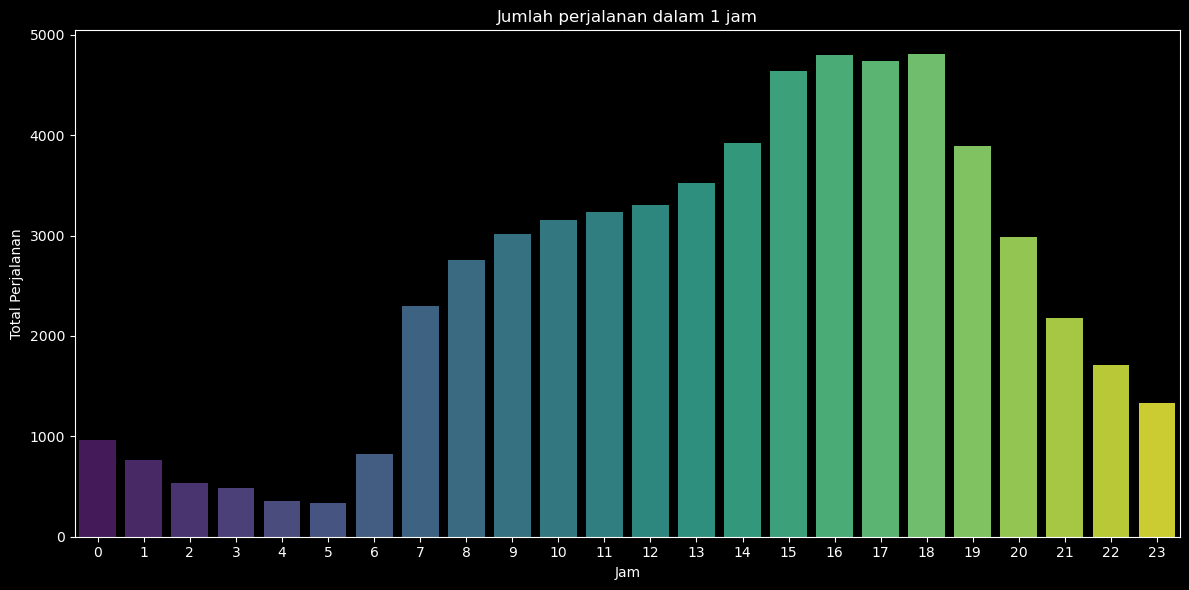

In [2229]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_trip_per_hour['hour'], y=df_trip_per_hour['trip_count'], palette='viridis')
plt.title('Jumlah perjalanan dalam 1 jam')
plt.xlabel('Jam')
plt.ylabel('Total Perjalanan')
plt.tight_layout()
plt.show()

Insight:
- Jam 18 menjadi jam yang banyak penumpang naik.
- Penumpang cenderung banyak terjadi di jam pagi hingga sore

In [2230]:
# mengelompokkan berdasarkan jam dan menghitung total pendapatan dari kelompok jam tersebut
pendapatan_per_jam = df_clean_Time_Location.groupby('pickup_hour')['total_amount'].sum()

**Pendapatan Tertinggi**

In [2231]:
pendapatan_per_jam.idxmax()

16

Insight:
- pendapatan tertinggi dari pick up hour terdapat pada jam 16

In [2232]:
pendapatan_per_jam.max()

106567.85

Insight:
- jumlah pendapatan tertinggi berdasarkan pick up hour bernilai $106567.85

**Pendapatan Terendah**

In [2233]:
pendapatan_per_jam.idxmin()

4

Insight:
- pendapatan terendah dari pick up hour terdapat pada jam 4

In [2234]:
pendapatan_per_jam.min()

8602.71

Insight:
- jumlah pendapatan terendah berdasarkan pick up hour bernilai $8602.71

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\4288387439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pendapatan_per_jam.index, y=pendapatan_per_jam.values, palette='viridis')


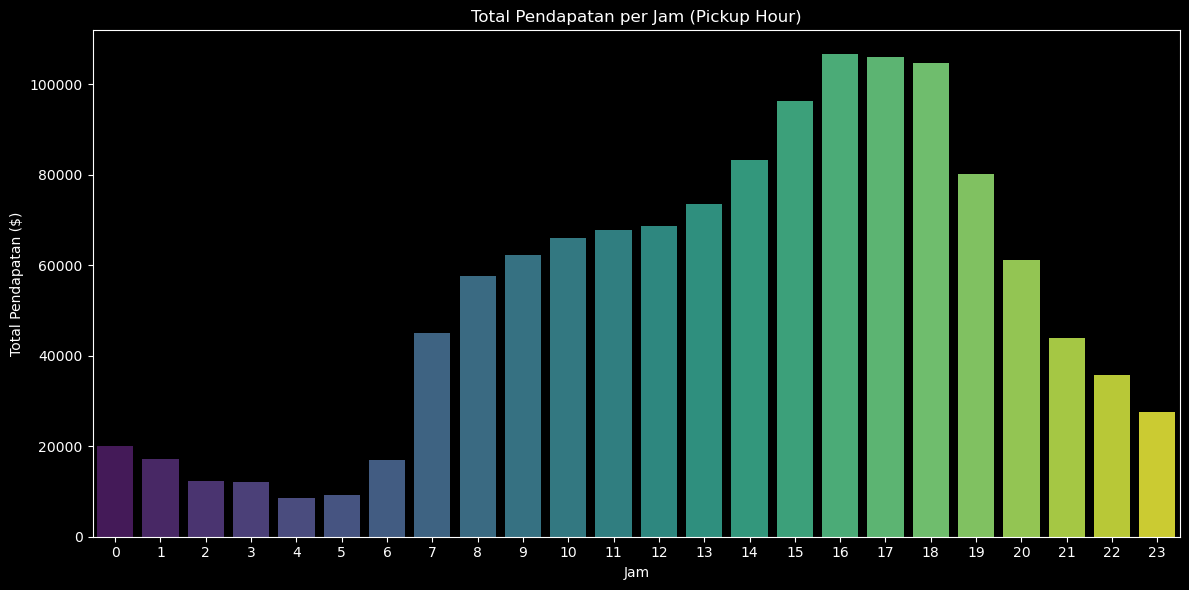

In [2235]:
plt.figure(figsize=(12, 6))
sns.barplot(x=pendapatan_per_jam.index, y=pendapatan_per_jam.values, palette='viridis')
plt.title('Total Pendapatan per Jam (Pickup Hour)')
plt.xlabel('Jam')
plt.ylabel('Total Pendapatan ($)')
plt.tight_layout()
plt.show()

Insight:
- Pendapatan tertinggi terdapat pada jam 16.
- Rata-rata pendapatan yang tinggi cenderung didapatkan pada jam siang ke sore

### Lokasi

In [2236]:
pendapatan_per_lokasi = df_clean_Time_Location.groupby('PULocationID')['total_amount'].sum()

**Pendapatan Tertinggi**

In [2237]:
pendapatan_per_lokasi.idxmax()

'74'

Insight:
- Lokasi dengan pendapatan tertinggi terdapat pada PULocationID 74

In [2238]:
pendapatan_per_lokasi.max()

244751.61

Insight:
- Jumlah pendapatan tertinggi berdasarkan pick up location bernilai $244751.61

**Pendaptan Terendah**

In [2239]:
pendapatan_per_lokasi.idxmin()

'124'

Insight:
- Lokasi dengan pendapatan terendah terdapat pada PULocationID 124

In [2240]:
pendapatan_per_lokasi.min()

5.0

Insight:
- Jumlah pendapatan terendah berdasarkan pick up location bernilai $5.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\2022953234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_lokasi.index.astype(str), y=top10_lokasi.values, palette='crest')


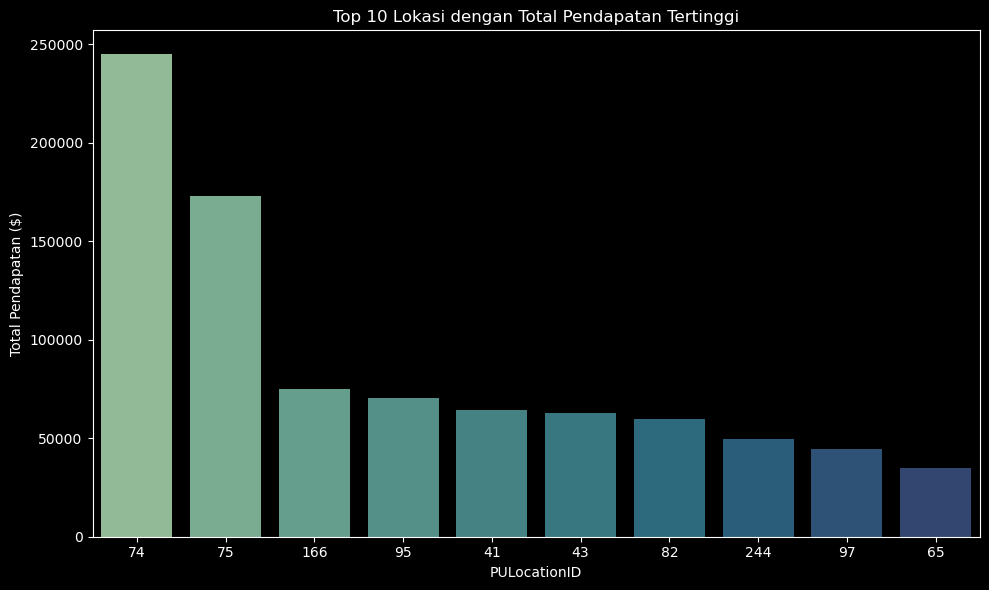

In [2241]:
top10_lokasi = pendapatan_per_lokasi.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_lokasi.index.astype(str), y=top10_lokasi.values, palette='crest')
plt.title('Top 10 Lokasi dengan Total Pendapatan Tertinggi')
plt.xlabel('PULocationID')
plt.ylabel('Total Pendapatan ($)')
plt.tight_layout()
plt.show()

Insight:
- Lokasi dengan pendapatan tertinggi terdapat di PULocationID 74

## Adakah pola biaya yang tinggi pada lokasi tertentu?

In [2242]:
df_clean_charge = df_clean.copy()

In [2243]:
# mengambil kolom biaya (charge tambahan yang dikenakan selain biaya taksi)
charge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']

In [2244]:
# membuat kolom baru total_surcharge dan diisi dengan charge_colums
df_clean_charge['total_surcharge'] = df_clean_charge[charge_columns].sum(axis=1)

Mencari apakah terdapat perbedaan signifikan total_surcharge antar PULocationID

In [2245]:
from scipy.stats import f_oneway

In [2246]:
# mengelompokkan total surcharge keseluruhan berdasarkan PULocationID
grouped_surcharge = df_clean_charge.groupby('PULocationID')['total_surcharge'].apply(list)

In [2247]:
# Lakukan one-way ANOVA
# p_value >= 0.05 H0: tidak ada perbedaan signifikan total_surcharge surcharge antar PULocationID.
# p_value < 0.05 H1: terdapat perbedaan signifikan total_surcharge antar PULocationID.
f_stat, p_value = f_oneway(*grouped_surcharge)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 32.8179907368051
P-value: 0.0


Insight:
- P-value = 0.0 -> tolah H0 -> Terdapat perbedaan signifikan total_surcharge antar PULocationID.

In [2248]:
df_clean_charge['PULocationID'].astype(str)

0        166
1         24
2         41
3         41
4         41
        ... 
60550    130
60551     65
60552    244
60553     74
60554     95
Name: PULocationID, Length: 60555, dtype: object

In [2249]:
df_clean_charge

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min,total_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667,5.25
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667,2.50
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667,3.00
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667,3.00
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60550,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333,0.30
60551,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000,2.50
60552,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667,2.50
60553,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333,5.25


In [2250]:
# menghitung rata-rata biaya tambahan per lokasi pick up
surcharge_per_location = df_clean_charge.groupby('PULocationID')['total_surcharge'].mean()

In [2251]:
surcharge_per_location

PULocationID
10     1.773077
101    0.000000
102    1.517647
106    3.864286
108    2.416667
         ...   
93     2.590909
94     2.110000
95     2.521188
97     2.460871
98     2.935714
Name: total_surcharge, Length: 186, dtype: float64

In [2252]:
top_surcharge_location = surcharge_per_location.sort_values(ascending=False)

In [2253]:
top_surcharge_location.head(10)

PULocationID
23     17.100000
251     9.550000
222     6.766667
81      5.900000
182     5.627778
194     5.300000
252     5.275000
138     4.950000
43      4.897353
213     4.720000
Name: total_surcharge, dtype: float64

Insight:
- PULocationID 23 menjadi pick up lokasi dengan rata-rata charge tertinggi, bernilai $17.1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\942375438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_surcharge.index.astype(str), y=top10_surcharge.values, palette='mako')


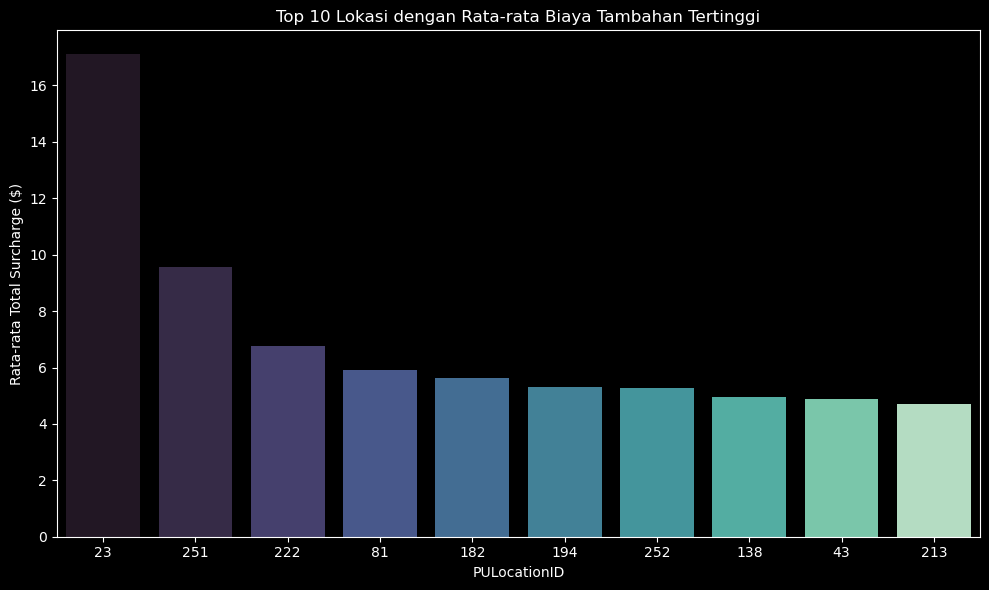

In [2255]:
top10_surcharge = top_surcharge_location.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_surcharge.index.astype(str), y=top10_surcharge.values, palette='mako')
plt.title('Top 10 Lokasi dengan Rata-rata Biaya Tambahan Tertinggi')
plt.xlabel('PULocationID')
plt.ylabel('Rata-rata Total Surcharge ($)')
plt.tight_layout()
plt.show()

Insight:
- PULocationID 23 menjadi pick up lokasi dengan rata-rata charge tertinggi

## Berapa persen trip yang sangat pendek (<1 mile), dan apakah itu efisien secara operasional?

Asumsi:
Trip distance yang di bawah 1 mile digolongkan sebagai trip yang pendek, sedangkan trip yang lebih besar atau sama dengan 1 mile digolongkan sebagai trip normal

In [2256]:
# mengambil jumlah trip yang pendek
df_clean_short_trip = df_clean[df_clean['trip_distance'] < 1].copy()

In [2257]:
# mengambil jumlah trip yang normal
df_clean_normal_trip = df_clean[df_clean['trip_distance'] >= 1].copy()

In [2258]:
# melihat jumlah trip yang pendek
len(df_clean_short_trip)

10330

Insight:
- terdapat 10330 trip yang tergolong pendek (short trip)

In [2259]:
# mencari persentase short trip
len(df_clean_short_trip)/len(df_clean)

0.17058872099744035

Insight:
- terdapat sekitar 17 persen trip yang pendek (short trip) dari total keseluruhan trip

In [2260]:
# hitung efisiensi
# short trip
df_clean_short_trip['revenue_per_miles'] = df_clean_short_trip['total_amount'] / df_clean_short_trip['trip_distance']
df_clean_short_trip['revenue_per_min'] = df_clean_short_trip['total_amount'] / df_clean_short_trip['trip_duration_min']

# normal trip
df_clean_normal_trip['revenue_per_miles'] = df_clean_normal_trip['total_amount'] / df_clean_normal_trip['trip_distance']
df_clean_normal_trip['revenue_per_min'] = df_clean_normal_trip['total_amount'] / df_clean_normal_trip['trip_duration_min']

In [2261]:
df_clean_short_trip_slice = df_clean_short_trip[['revenue_per_min', 'revenue_per_miles']].copy()

In [2262]:
df_clean_short_trip_slice

,revenue_per_min,revenue_per_miles
18,1.538106,11.562500
19,2.968163,12.625000
20,1.992000,15.660377
22,2.124088,11.022727
53,2.428058,17.857143
...,...,...
60508,327.272727,750.000000
60533,2.698522,12.680556
60542,2.488479,9.890110
60545,4.928571,18.157895


Mengecek distribusi revuenue_per_min dan revenie_per_km dari masing masing trip

<Figure size 600x300 with 0 Axes>

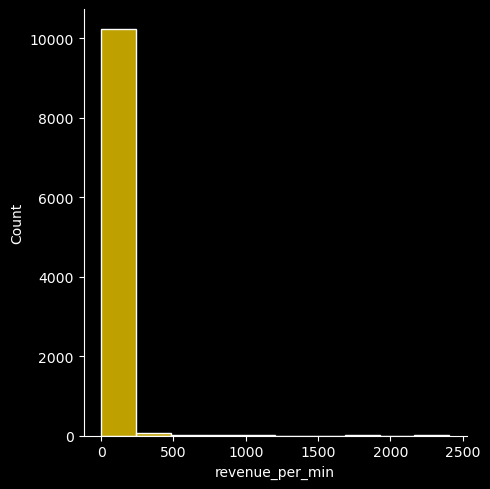

In [2263]:
plt.style.use('dark_background')
plt.figure(figsize = (6,3))
sns.displot(df_clean_short_trip['revenue_per_min'], bins=10, color='gold')

<Figure size 600x300 with 0 Axes>

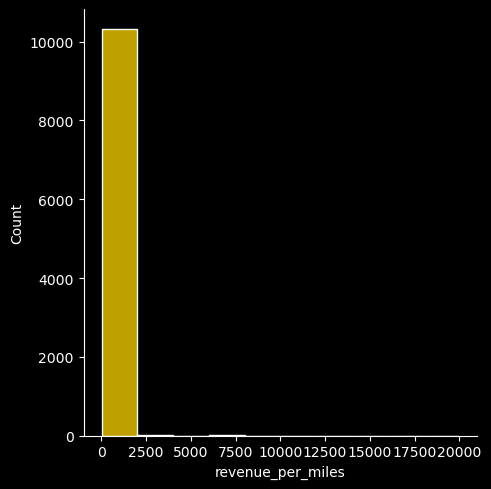

In [2264]:
plt.style.use('dark_background')
plt.figure(figsize = (6,3))
sns.displot(df_clean_short_trip['revenue_per_miles'], bins=10, color='gold')

<Figure size 600x300 with 0 Axes>

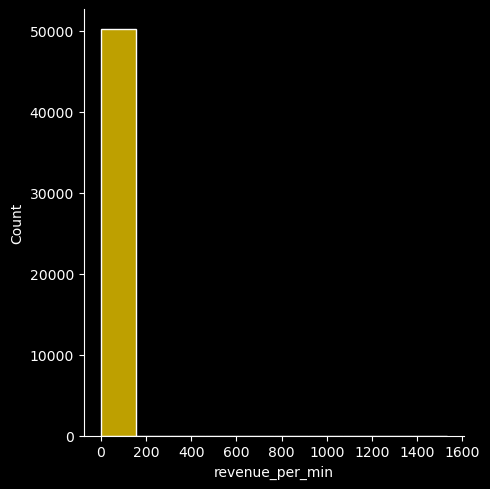

In [2265]:
plt.style.use('dark_background')
plt.figure(figsize = (6,3))
sns.displot(df_clean_normal_trip['revenue_per_min'], bins=10, color='gold')

<Figure size 600x300 with 0 Axes>

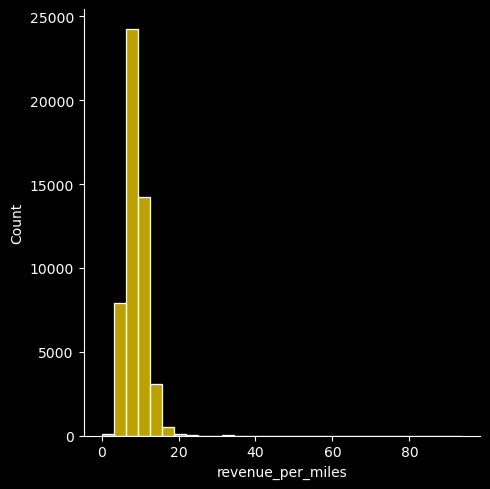

In [2266]:
plt.figure(figsize = (6,3))
sns.displot(df_clean_normal_trip['revenue_per_miles'], bins=30, color='gold')

Insight:
- Keempat data tersebut bersifat right skew, tidak berdistribusi normal. Oleh karena itu, median yang akan menjadi perwakilan nilai.

In [2267]:
print('Short Trip:')
print(f'Revenue per menit   : ${df_clean_short_trip['revenue_per_min'].median():.2f}')
print(f'Revenue per miles   : ${df_clean_short_trip['revenue_per_miles'].median():.2f}')

print('\n Normal Trip:')
print(f'Revenue per menit   : ${df_clean_normal_trip['revenue_per_min'].median():.2f}')
print(f'Revenue per miles   : ${df_clean_normal_trip['revenue_per_miles'].median():.2f}')

Short Trip:
Revenue per menit   : $2.08
Revenue per miles   : $14.31

 Normal Trip:
Revenue per menit   : $1.56
Revenue per miles   : $8.50


Insight:
- trip pendek memiliki revenue per km dan revenue per menit yang lebih tinggi dibandingkan normal
- tetapi jumlah keseluruhan trip pendek hanya berkisar di 17% dari keseluruhan trip, yang mana ini diasumsikan tidak begitu sering frekuensinya

## Apakah ada tren musiman yang memengaruhi volume trip dan revenue?

Melihat dalam 1 hari, ada berapa perjalanan

In [2268]:
df_clean_day_trip = df_clean.copy()

In [2269]:
# Ambil nama hari dari kolom datetime
df_clean_day_trip['day_name'] = df_clean_day_trip['lpep_pickup_datetime'].dt.day_name()

In [2270]:
# Hitung jumlah trip per hari
df_trip_per_day = df_clean_day_trip['day_name'].value_counts()

In [2271]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_trip_per_day = df_trip_per_day.reindex(day_order)

In [2272]:
df_trip_per_day

day_name
Monday        8873
Tuesday      10041
Wednesday     8790
Thursday      9057
Friday        8872
Saturday      7572
Sunday        7350
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37300\2628674445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_trip_per_day.index, y=df_trip_per_day.values, palette='viridis')


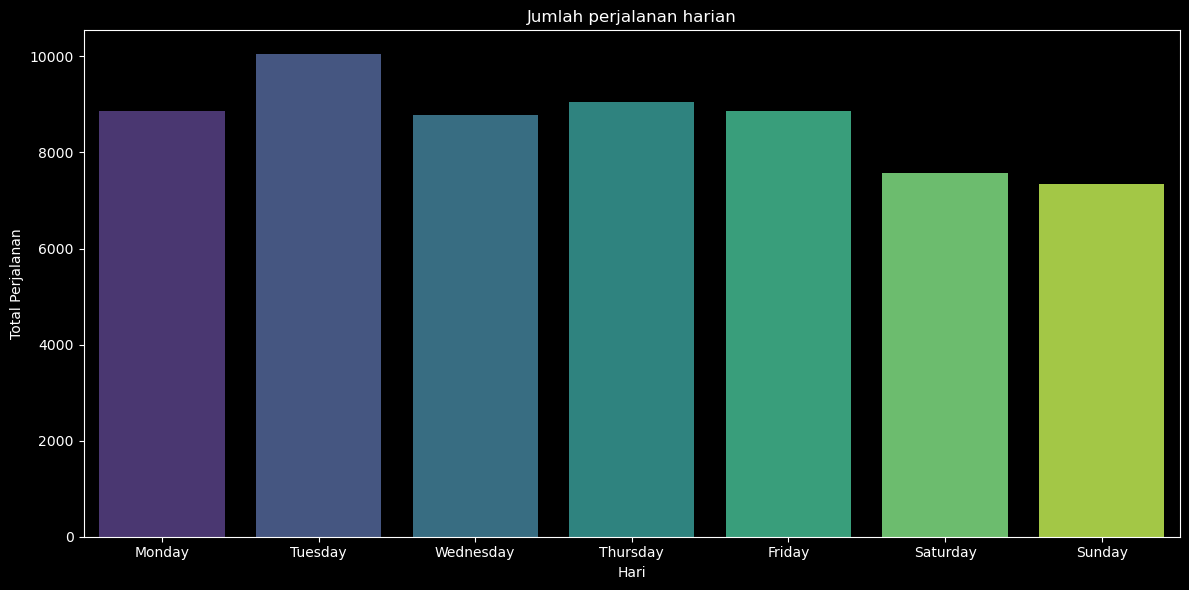

In [2273]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_trip_per_day.index, y=df_trip_per_day.values, palette='viridis')
plt.title('Jumlah perjalanan harian')
plt.xlabel('Hari')
plt.ylabel('Total Perjalanan')
plt.tight_layout()
plt.show()

Mengecek bulan apa saja yang direcord data dan berapa jumlahnya dalam bulan tersebut

In [2274]:
df_clean_waktu = df_clean.copy()

In [2275]:
df_clean_waktu['month'] = df_clean_waktu['lpep_pickup_datetime'].dt.to_period('M').astype(str)

In [2276]:
df_clean_waktu['total_trip_month'] = df_clean_waktu.groupby('month')['month'].transform('count')

In [2277]:
df_months = df_clean_waktu.drop_duplicates(subset='month')[['month', 'total_trip_month']].sort_values('month')

In [2278]:
df_months

,month,total_trip_month
16893,2009-01,1
272,2022-12,2
0,2023-01,60551
23708,2023-02,1


Insight:
- trip record terfokus hanya di bulan Januari 2023, maka analisis akan berfokus pada Januari 2023 dengan jumlah data 60551

In [2279]:
# mengambil data pada bulan Januari 2023
df_clean_jan = df_clean[(df_clean['lpep_pickup_datetime'].dt.month == 1) &(df_clean['lpep_pickup_datetime'].dt.year == 2023)].copy()

In [2280]:
df_clean_jan['pickup_date'] = df_clean_jan['lpep_pickup_datetime'].dt.date

In [2281]:
# menggabungkan nama hari dan tanggal : day, yyyy-mm-dd
df_clean_jan['day_label'] = df_clean_jan['lpep_pickup_datetime'].dt.strftime('%a, %Y-%m-%d')

In [2282]:
df_harian = df_clean_jan.groupby(['pickup_date', 'day_label']).agg({
    'lpep_pickup_datetime': 'count',
    'total_amount': 'sum'
}).rename(columns={
    'lpep_pickup_datetime': 'trip_count',
    'total_amount': 'total_revenue'
}).reset_index()

In [2283]:
df_harian.to_excel('daily trip and revenue.xlsx', sheet_name='Sheet1')

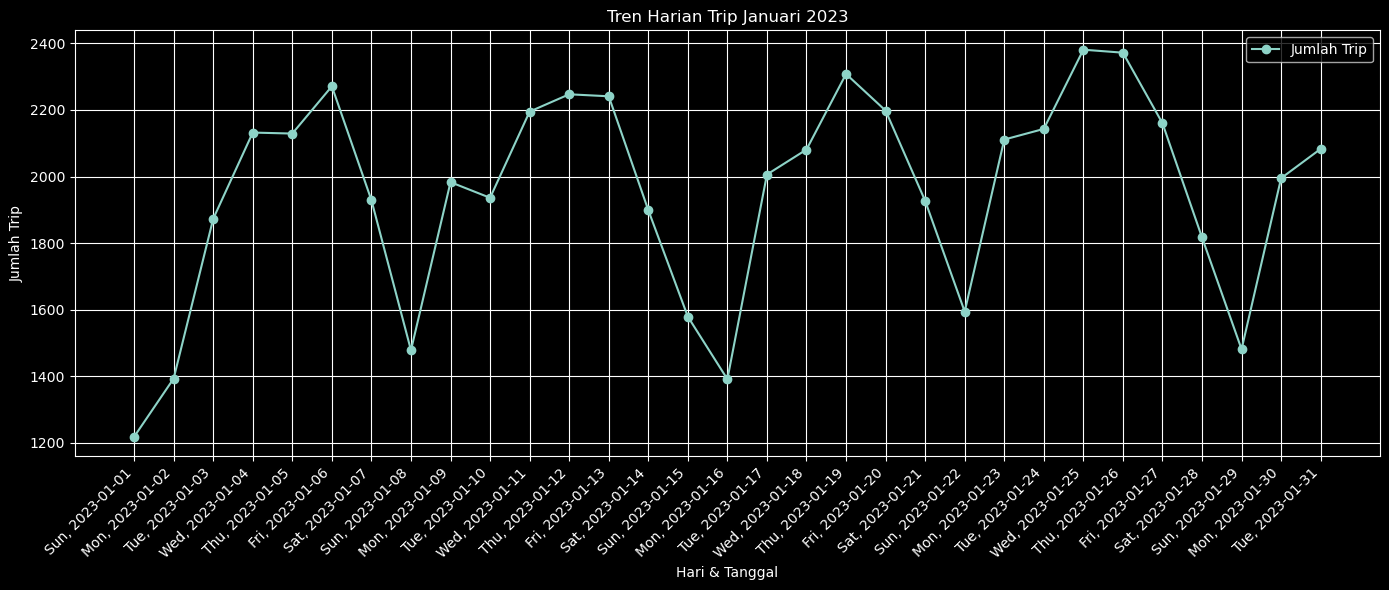

In [2284]:
plt.figure(figsize=(14, 6))

plt.plot(df_harian['day_label'], df_harian['trip_count'], marker='o', label='Jumlah Trip')

plt.title('Tren Harian Trip Januari 2023')
plt.xlabel('Hari & Tanggal')
plt.ylabel('Jumlah Trip')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

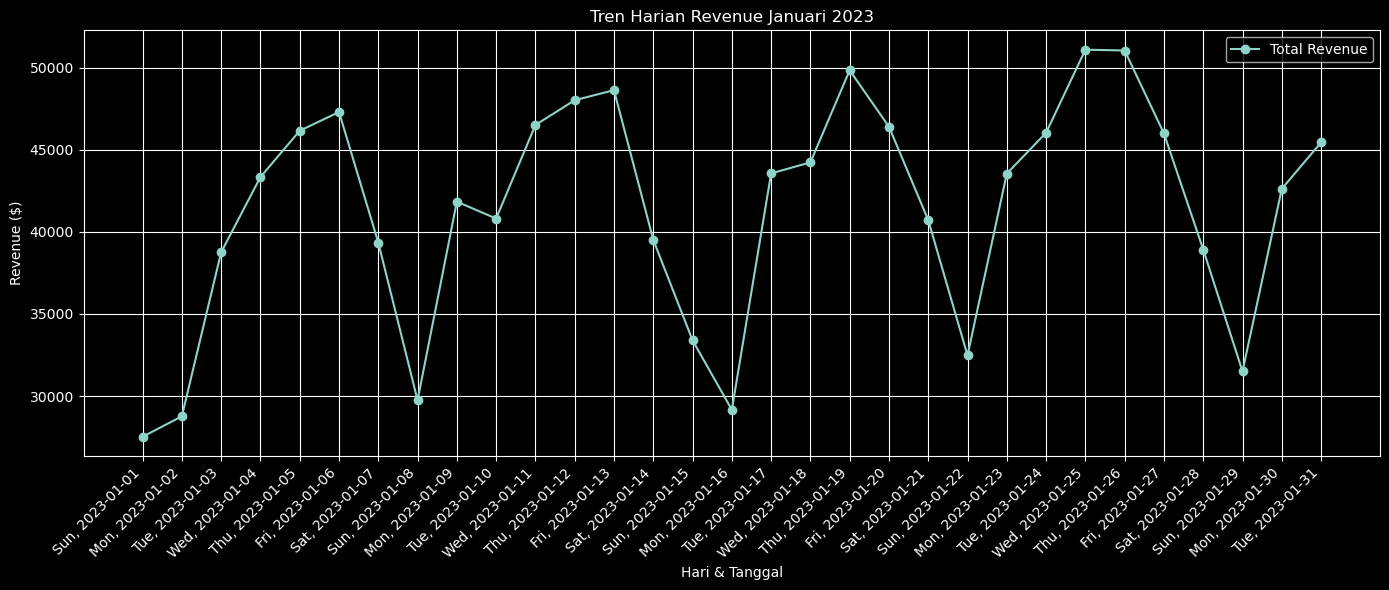

In [2285]:
plt.figure(figsize=(14, 6))

plt.plot(df_harian['day_label'], df_harian['total_revenue'], marker='o', label='Total Revenue')

plt.title('Tren Harian Revenue Januari 2023')
plt.xlabel('Hari & Tanggal')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

Insight:
- berdasarkan dari kedua line plot di atas, trip cenderung naik saat weekday, dan turun saat weekend

In [2286]:
# Tambahkan nama hari
df_clean_jan['day_name'] = df_clean_jan['lpep_pickup_datetime'].dt.day_name()

# Hitung total revenue per nama hari
revenue_by_day = df_clean_jan.groupby('day_name')['total_amount'].sum()

In [2287]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [2288]:
revenue_by_day = revenue_by_day.reindex(day_order)

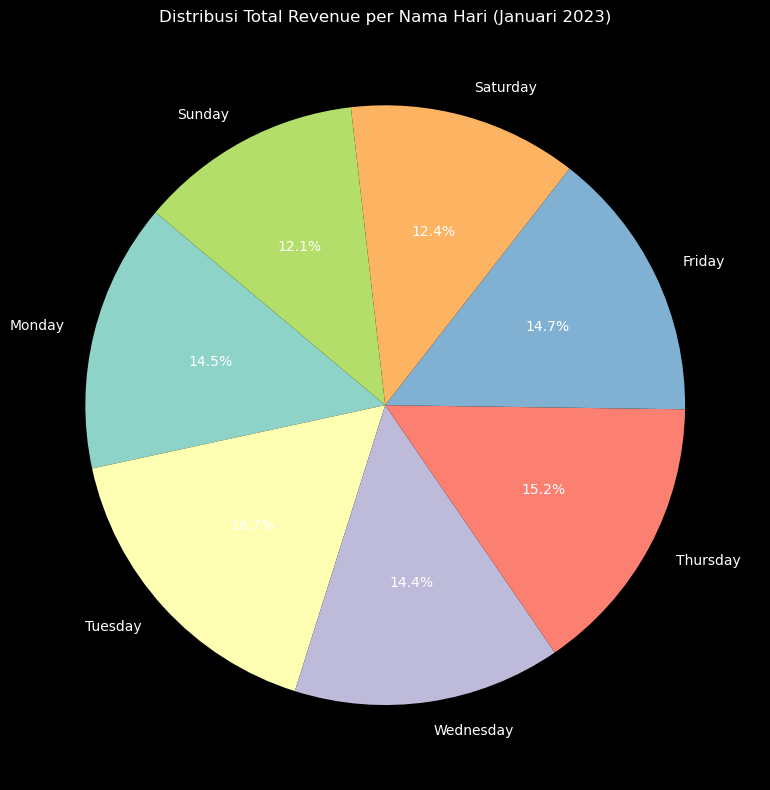

In [2289]:
plt.figure(figsize=(8, 8))
plt.pie(
    revenue_by_day,
    labels=revenue_by_day.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors  # Warna lembut
)
plt.title('Distribusi Total Revenue per Nama Hari (Januari 2023)')
plt.tight_layout()
plt.show()

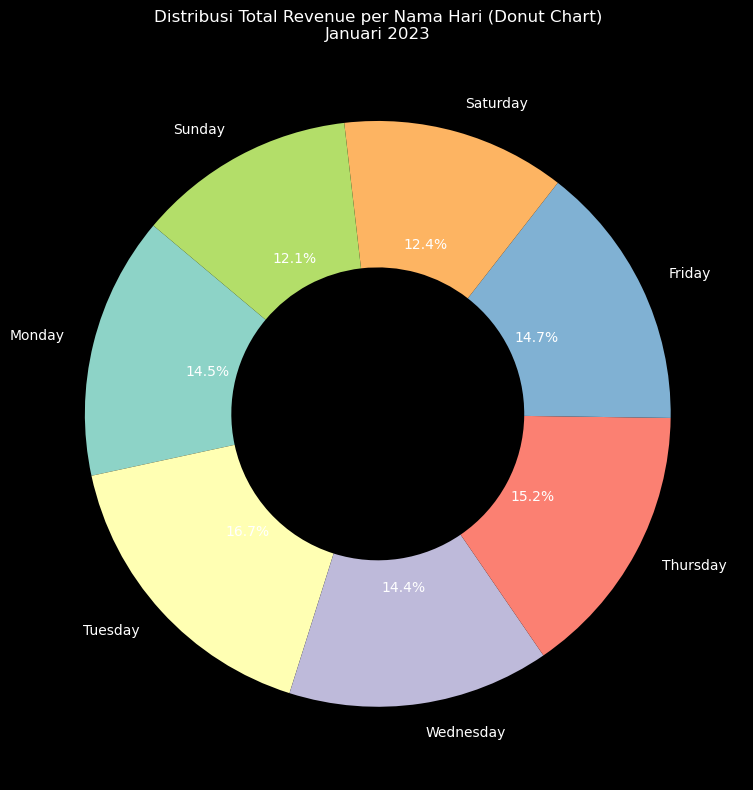

In [2290]:
plt.figure(figsize=(8, 8))

# Buat pie chart
wedges, texts, autotexts = plt.pie(
    revenue_by_day,
    labels=revenue_by_day.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors,
    wedgeprops=dict(width=0.5)  # 👉 ini membuat 'bolong' (donut)
)

# Tambahkan judul
plt.title('Distribusi Total Revenue per Nama Hari (Donut Chart)\nJanuari 2023')
plt.tight_layout()
plt.show()

## Apakah perjalanan ke bandara (JFK (RatecodeID = 2)/Newark (RatecodeID = 3)) lebih menguntungkan dibandingkan trip lokal?

In [2291]:
summary = df_clean.groupby('RatecodeID')['total_amount'].agg(['count', 'mean', 'sum']).reset_index()
summary.columns = ['RatecodeID', 'Total Trip', 'Average Total Amount', 'Grand Total']

In [2292]:
summary

,RatecodeID,Total Trip,Average Total Amount,Grand Total
0,1.0,59398,20.710903,1230186.21
1,2.0,131,87.374046,11446.00
2,3.0,20,103.548000,2070.96
3,4.0,53,110.632830,5863.54
4,5.0,953,34.372277,32756.78


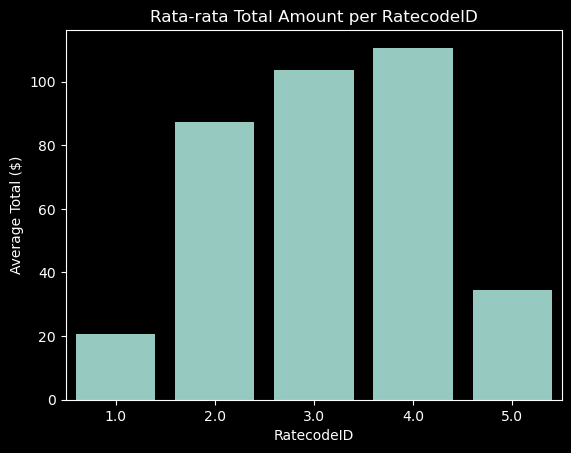

In [2293]:
sns.barplot(data=summary, x='RatecodeID', y='Average Total Amount')
plt.title("Rata-rata Total Amount per RatecodeID")
plt.ylabel("Average Total ($)")
plt.show()

Insight:
- Rata-rata pendapatan tertinggi terdapat pada RatecodeID 4, senilai $110.63

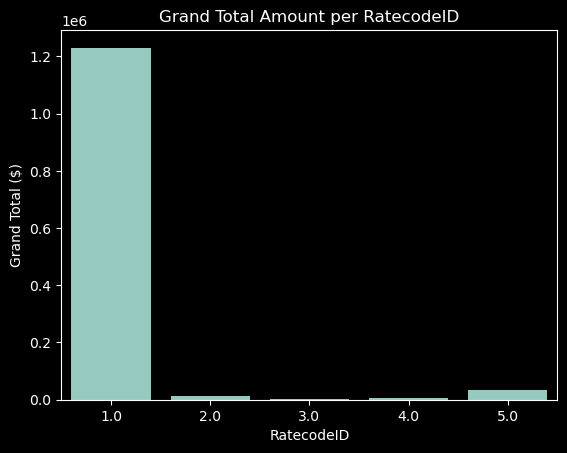

In [2294]:
sns.barplot(data=summary, x='RatecodeID', y='Grand Total')
plt.title("Grand Total Amount per RatecodeID")
plt.ylabel("Grand Total ($)")
plt.show()

Insight:
- Total pendapatan tertinggi terdapat pada RatecodeID 1, senilai $1230186.21

# Mengexport DataFrame ke Excel (xlsx)

In [2295]:
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60550,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,7.983333
60551,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,10.750000
60552,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,6.016667
60553,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,9.533333


In [ ]:
df_clean.to_excel('NYCTLCTripRecordClean.xlsx', sheet_name = 'Sheet1')

# Mengexport DataFrame ke csv

In [2298]:
df_clean.to_csv('NYCTLCTripRecordClean.csv')